<a href="https://colab.research.google.com/github/costpetrides/Forecasting-Temperature-with-Prophet-and-ML-Models/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)


df = pd.read_csv("/content/DailyDelhiClimateTrain.csv",
                 parse_dates=['date'],  # change to date time format
                 index_col="date")
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500


In [11]:
df["year"] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date
df.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,2013-01-05


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   dayofweek     1462 non-null   int32  
 8   date          1462 non-null   object 
dtypes: float64(4), int32(4), object(1)
memory usage: 91.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.000,25.496,7.348,6.000,18.857,27.714,31.306,38.714
humidity,1462.000,60.772,16.770,13.429,50.375,62.625,72.219,100.000
wind_speed,1462.000,6.802,4.562,0.000,3.475,6.222,9.238,42.220
meanpressure,1462.000,1011.105,180.232,-3.042,1001.580,1008.563,1014.945,7679.333
year,1462.000,2014.503,1.120,2013.000,2014.000,2015.000,2016.000,2017.000
month,1462.000,6.519,3.452,1.000,4.000,7.000,10.000,12.000
day,1462.000,15.720,8.809,1.000,8.000,16.000,23.000,31.000
dayofweek,1462.000,3.002,2.000,0.000,1.000,3.000,5.000,6.000


In [15]:
import plotly.express as px

# Mean Temperature Plot
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

# Humidity Plot
fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

# Wind Speed Plot
fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

# Mean Pressure Plot
fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='plotly', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()


In [25]:
fig = px.box(df, x='month', y='meantemp', title='Monthly Distribution of Mean Temperatures', template='plotly')
fig.show()

fig = px.box(df, x='month', y='humidity', title='Monthly Distribution of Mean Humidity', template='plotly')
fig.show()

fig = px.box(df, x='month', y='wind_speed', title='Monthly Distribution of Mean wind_speed', template='plotly')
fig.show()

fig = px.box(df, x='month', y='meanpressure', title='Monthly Distribution of Mean Pressure', template='plotly')
fig.show()

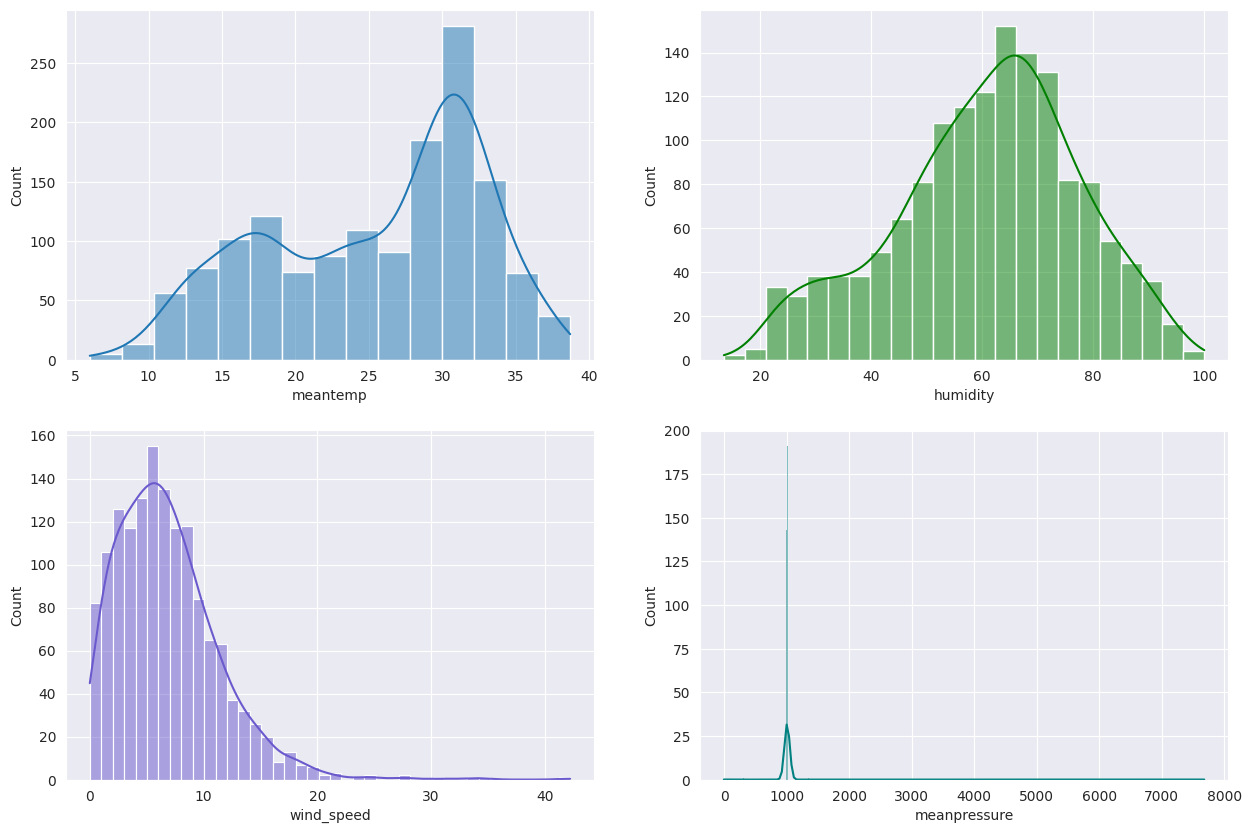

In [27]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="meantemp", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="humidity", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="wind_speed", ax=ax[1][0], kde=True, color='slateblue')

sns.histplot(data=df, x="meanpressure", ax=ax[1][1], kde=True, color='teal')

# Show the plot
plt.show()

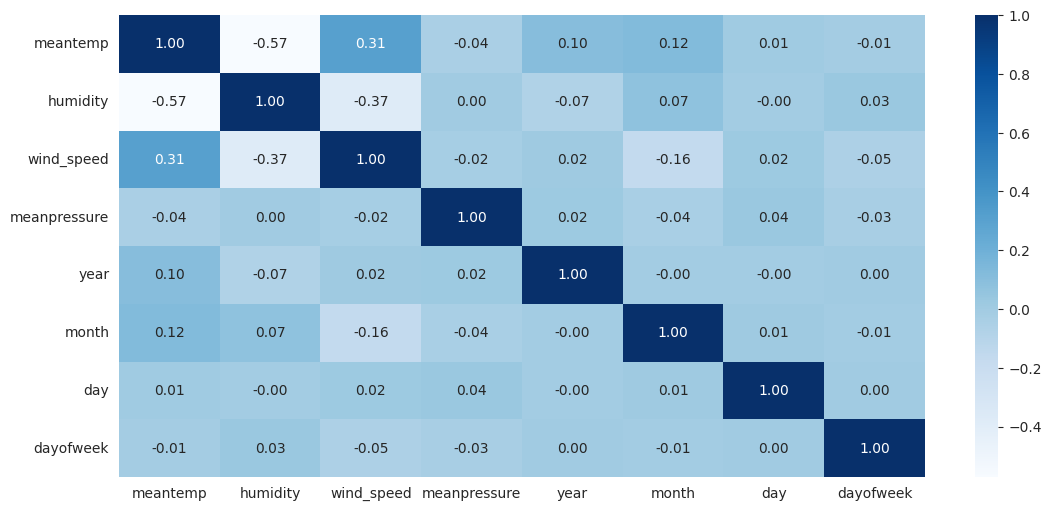

In [22]:
plt.figure(figsize=(13, 6))
sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)

# Create subplots for the decomposed components
fig = sp.make_subplots(
    rows=4, cols=1, shared_xaxes=True,
    subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual']
)

# Add traces for each component
fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

# Update layout with the correct template
fig.update_layout(
    template='plotly',
    height=800,
    title='Decomposition of Mean Temperature',
    title_x=0.5
)

# Show the figure
fig.show()

From our analysis, it appears that the average pressure (meanpressure) remains relatively constant across months and shows minimal correlation with the mean temperature (meantemp). Consequently, we have decided to proceed with the following three features for modeling: mean temperature (meantemp) as the target variable, and humidity and wind speed as predictor variables

In [34]:
df1 = df[['meantemp', 'humidity', 'wind_speed']]
df1.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700
